# Amazon-Seller-Sales- Data Analysis 

![image.png](attachment:image.png)

# NumPy 

NumPy (or Numpy) is a Linear Algebra Library for Python, the reason it is so important for Data Science with Python is that almost all of the libraries in the PyData Ecosystem rely on NumPy as one of their main building blocks.

Numpy is also incredibly fast, as it has bindings to C libraries. For more info on why you would want to use Arrays instead of lists, check out this great [StackOverflow post](http://stackoverflow.com/questions/993984/why-numpy-instead-of-python-lists).

We will only learn the basics of NumPy, to get started we need to install it!

## Installation Instructions

**It is highly recommended you install Python using the Anaconda distribution to make sure all underlying dependencies (such as Linear Algebra libraries) all sync up with the use of a conda install. If you have Anaconda, install NumPy by going to your terminal or command prompt and typing:**
    
    conda install numpy
    
**If you do not have Anaconda and can not install it, please refer to [Numpy's official documentation on various installation instructions.](http://docs.scipy.org/doc/numpy-1.10.1/user/install.html)**

![image.png](attachment:image.png)

# Introduction to Pandas

In this section of the course we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features. In this section of the course, you should go through the notebooks in this order:

* Introduction to Pandas
* Series
* DataFrames
* Missing Data
* GroupBy
* Merging,Joining,and Concatenating
* Operations

# Matplotlib

![image-2.png](attachment:image-2.png)

# Matplotlib

Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays. It provides an object-oriented API that helps in embedding plots in applications using Python GUI toolkits such as PyQt, WxPythonotTkinter. It can be used in Python and IPython shells, Jupyter notebook and web application servers also.


Matplotlib is written in Python and makes use of NumPy, the numerical mathematics extension of Python. We assume that the readers of this tutorial have basic knowledge of Python.




# Downloading Amazon Order History Data

Amazon allows you to download pretty extensive reports on the orders you’ve made, although the available data only dates back to 2006. Still, if you’re a regular Amazon user, more than a decade of data is likely to contain some interesting insights!

To get the data, clicking on this link while logged in should take us directly to the order reports download page. But if that doesn’t work, we can also navigate to that page directly: go to Amazon.com and click the Accounts and Lists button in the top right. On the next page, look for the Ordering and Shopping Preferences section, and click on the link under that heading that says “Download order reports”.

If you’d like to work through this tutorial but would prefer not to use your own data, you can download the same anonymized data set we’re using for this tutorial.

![image.png](attachment:image.png)

Amazon offers four different report types. For now, we’re going to download an Orders and shipments report, so select that option from the drop-down menu. Then, we can choose a start date and end date for the data we’d like to look at. To see all of Amazon’s stored data, we’ll need to set the Start Date to January 1, 2006. Then, we can click the little “Use today” button next to the End Date to automatically fill in today’s date

![image.png](attachment:image.png)

Once everything is ready, click “Request Report” and Amazon will begin building the report for you.

We’re almost ready to dive into a little programming and do our analysis. But first, let’s make things a little easier by renaming and moving that file we just downloaded. By default, this will probably be called something like 01_Jan_2006_to_10_Sept_2019.csv, but let’s rename it something simpler: amazon-orders.csv.

# Link for DataSet : 
https://drive.google.com/file/d/1ZzhlaxYp8nfaDDO1-fSrO_lxl8nYZuwM/view?usp=sharing

# Getting the Data into Pandas

Our first step will be to write the code to open and look at our Amazon data, so that we can see what we’re working with. We’ll be using pandas for most of our analysis
, so our first step will be to import the pandas package and give it the nickname pd so that we can refer to it more easily in our code.

Finally, we’ll use a pandas function called .head() to look at the first five rows our our data, which will give us a taste of what we’re working with, and what kinds of data Amazon’s order history includes.

In [3]:
import pandas as pd

df = pd.read_csv('amazon_orders.csv')
df.head(10)

Order Date             Order ID  ... Buyer Name Group Name
0   04/01/19  112-0000000-0000001  ...  Your Name        NaN
1   04/01/19  112-0000000-0000002  ...  Your Name        NaN
2   04/01/19  112-0000000-0000003  ...  Your Name        NaN
3   04/04/19  112-0000000-0000004  ...  Your Name        NaN
4   04/05/19  112-0000000-0000005  ...  Your Name        NaN
5   04/05/19  112-0000000-0000006  ...  Your Name        NaN
6   04/07/19  112-0000000-0000007  ...  Your Name        NaN
7   04/08/19  112-0000000-0000008  ...  Your Name        NaN
8   04/20/19  112-0000000-0000009  ...  Your Name        NaN
9   04/23/19  112-0000000-0000010  ...  Your Name        NaN

[10 rows x 23 columns]

In [4]:
df.shape

(59, 23)

# Cleaning the Data

Cleaning the data is an important part of most data analysis projects, and we’ll need to do a little bit of data cleaning here before we can do our analysis and find out the total sum we’ve spent on Amazon.

Let’s start by dealing with those NaN values. We need to do some math with our data, but 1 + NaN is a tough math problem to solve. NaN, after all, isn’t a number! Since NaN represents the absence of information, let’s just fill in all of those NaN values using pandas’s handy df.fillna() function. This allows us to automatically replace every NaN value with something else. In this case, let’s replace NaN with the number zero.

We need to be a little careful here, though. We don’t just want to replace those values temporarily! We want to replace them and then store that version of the DataFrame as our new DataFrame. We’ll use df = df.fillna(0) to replace the values and re-define our df variable to point to that new dataframe.

Then, we’ll use the .head() function again to make sure our changes worked.


In [5]:
df.isnull().sum()

Order Date                         0
Order ID                           0
Payment Instrument Type            0
Website                            0
Purchase Order Number             59
Ordering Customer Email            0
Shipment Date                      0
Shipping Address Name              0
Shipping Address Street 1          0
Shipping Address Street 2         59
Shipping Address City              0
Shipping Address State             0
Shipping Address Zip               0
Order Status                       0
Carrier Name & Tracking Number     0
Subtotal                           0
Shipping Charge                    0
Tax Before Promotions              0
Total Promotions                   0
Tax Charged                        0
Total Charged                      0
Buyer Name                         0
Group Name                        59
dtype: int64

In [6]:
df = df.fillna(0)
df.head()

Order Date             Order ID  ... Buyer Name Group Name
0   04/01/19  112-0000000-0000001  ...  Your Name        0.0
1   04/01/19  112-0000000-0000002  ...  Your Name        0.0
2   04/01/19  112-0000000-0000003  ...  Your Name        0.0
3   04/04/19  112-0000000-0000004  ...  Your Name        0.0
4   04/05/19  112-0000000-0000005  ...  Your Name        0.0

[5 rows x 23 columns]

 Great! As we can see, our null values have all been replaced with zeroes, which is going to make doing calculations easier.

We still have a little data cleaning problem, though. The prices in this data set have been stored as strings, which means the computer is seeing them as a series of characters, rather than numbers that it can add together. They also include the character $, which isn’t a number.

Before we can perform calculations with these values, we need to remove those dollar signs, and then we need to turn the string values into floats — a numeric data type that Python can easily perform calculations on. Thankfully, these operations will require just a few more lines of code.

Specifically, there are two pandas functions we can use. The first, Series.str.replace() allows us to replace one character or set of characters with another in any column (called a Series in pandas) of a dataframe. For our purposes, this is helpful because we can use the syntax df["Total Charged"].str.replace('$','') to tell Python to replace what’s inside of the first set of ” ($) that’s in the “Total Charged” column with what’s inside of the second set (nothing).

In other words, we’re telling pandas to replace the character $ with nothing in that column. That way, all that will be left is the numbers. Once we just have numbers in the column, we can use the function .astype(float) to convert each entry in the column into the float type so that we can do our math.

Once again, we don’t want to make these changes temporarily, we want to modify our DataFrame and then point our df variable to that new version of the DataFrame. However, since this time we’re only modifying one column of the data, we’ll use df["Total Charged"] to specify that we only want to make these changes in that column.

Now, let’s put it all together, and then once again use head() to check our work on the next line.

In [7]:
df["Total Charged"] = df["Total Charged"].str.replace('$','').astype(float)
df.head()


Order Date             Order ID  ... Buyer Name Group Name
0   04/01/19  112-0000000-0000001  ...  Your Name        0.0
1   04/01/19  112-0000000-0000002  ...  Your Name        0.0
2   04/01/19  112-0000000-0000003  ...  Your Name        0.0
3   04/04/19  112-0000000-0000004  ...  Your Name        0.0
4   04/05/19  112-0000000-0000005  ...  Your Name        0.0

[5 rows x 23 columns]

Scroll over to the right in this table and you can see that we’ve done it: the dollar signs are all gone. Now it’s time for the fun part, or perhaps the scary part: finding out how much we’ve actually spent on Amazon over the years!

# Calculating the Total Amount of Money Spent on Amazon

Pandas includes some basic math functions that we can use on this column. Let’s start with .sum(), which will give us the total of every number in this column — in other words, the total we’ve spent on Amazon.



In [8]:
df["Total Charged"].sum()

1777.7300000000002

There it is: $1,777.73. That’s how much money I have spent on Amazon, at least within the confines of this limited and edited data set.

I don’t want to share the real total number I found when I analyzed the full 13 years of order history Amazon has for me, but it was…bigger. Did your total surprise you?

# Calculating Other Things: Average Spend on Amazon, Biggest Purchase, Etc.

Finding the total isn’t the only thing we can do now that we’ve got that column of data all cleaned up! Pandas allows us to very quickly make some other calculations. For example, what was the average purchase price? We can use .mean() to find out:

In [9]:
df["Total Charged"].mean()

30.131016949152542

My average spend per order, apparently, is about $30.

Since looking at the mean/average can sometimes hide outliers, it’s nice to check out the median as well. We can use .median() to do that.

In [10]:
df["Total Charged"].median()

15.95

That’s interesting! My median spend is quite a bit lower than my average spend. Looks like I made a few expensive orders. Let’s see what the highest-priced order was by using max():




In [11]:
df["Total Charged"].max()

210.99

OK, my priciest order was $211. What about my lowest-priced order? We can use .min() to find that one:

In [12]:
df["Total Charged"].min()

1.04

What on earth did I buy on Amazon that only cost $1? I can’t remember! (I could find that out in a different Amazon report, the Items report, but that’s bit more complicated and thus a topic for another time.)

# How Much Have I Paid in Sales Tax?

That’s a lot of interesting analysis of the total price I paid for each order, but what if I wanted to look into a different column? For example, what if I wanted to see how much I’ve paid in sales tax?

That data’s stored in the Tax Charged column. This column hasn’t been cleaned yet, so it has the same problems that the Total Charged column did when we started.

But here’s the beauty of programming: we’ve already written the code that can fix that. All we need to do is copy-paste our column-cleaning code from above, and replace "Total Charged" with "Tax Charged" to tell Python to perform those same operations on the "Tax Charged" column.

In [13]:
df["Tax Charged"] = df["Tax Charged"].str.replace('$','').astype(float)
df.head()

Order Date             Order ID  ... Buyer Name Group Name
0   04/01/19  112-0000000-0000001  ...  Your Name        0.0
1   04/01/19  112-0000000-0000002  ...  Your Name        0.0
2   04/01/19  112-0000000-0000003  ...  Your Name        0.0
3   04/04/19  112-0000000-0000004  ...  Your Name        0.0
4   04/05/19  112-0000000-0000005  ...  Your Name        0.0

[5 rows x 23 columns]

In [14]:
df["Tax Charged"].sum()

52.60999999999999

Apparently, about $52.61 of the total money I spent on Amazon went towards taxes. The tax rate on different items varies — we can see in the DataFrame preview above that some items did not charge any tax at all. But if we wanted to, we could figure out the overall tax rate by simply dividing our "Total Charged" sum from our "Tax Charged" sum, like so:

In [15]:
df["Tax Charged"].sum() / df["Total Charged"].sum()

0.02959392033660904

During this time period, I paid an overall effective sales tax rate of about 2.9%.

So far, the analysis we’ve done here is pretty cool, and we’ve learned something about our Amazon spending habits. If you’ve never written any code before and you’d like to learn more of this sort of thing, I’d recommend you stop here and sign up for our Python for Data Science Fundamentals course. It’s free, and it will give you a great foundation in the fundamentals so that soon, you’ll feel comfortable taking on projects like this, and even more complicated ones, totally on your own.

If you’d like a bit more of a challenge right now, though, there’s a lot more we can do with this data set. Let’s try to get a picture of how our spending habits have changed over time by doing some analysis that involves those date columns!

# Analyzing Amazon Spending Over Time

Before we can work with dates in Python, we need to convert them to a datetime data type, so that the computer can recognize them as dates. Luckily, with pandas this is quite straightforward! We can use .pd.to_datetime() and specify the column we want to modify within those brackets to tell pandas to read that column as dates.

As before, we want to make sure we’re storing this change in our df dataframe, so we’ll specify that we’re modifying the df['Order Date'] column, and then assign that to the “Order Date” column in our df variable so that the old "Order Date" column is replaced with our changed version.

We really only need to see one row to make sure our dates have changed here, so let’s feed a custom argument to our old friend df.head(). We can customize the number of rows it displays. If we put the number 1 inside those parentheses, it will display one row of the data set.

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

Order Date             Order ID  ... Buyer Name Group Name
0 2019-04-01  112-0000000-0000001  ...  Your Name        0.0
1 2019-04-01  112-0000000-0000002  ...  Your Name        0.0
2 2019-04-01  112-0000000-0000003  ...  Your Name        0.0
3 2019-04-04  112-0000000-0000004  ...  Your Name        0.0
4 2019-04-05  112-0000000-0000005  ...  Your Name        0.0

[5 rows x 23 columns]

From that one row, we can see that the date formatting has changed from 2019/04/01 to 2019-04-01. That’s a good sign that our change to datetime has worked, and we can proceed to the next step of our analysis.

One thing that might be interesting to look at is how much was spent on each particular day in this data set. That’s an analysis that would be easiest to look at visually, perhaps in the form of a bar graph. Luckily, the pandas and matplotlib packages make it possible for us to build and view a variety of chart types right inside a Jupyter Notebook!

We’ll start with a little Jupyter Notebooks magic that will allow us to display charts in our noteboot. (Note: when you run this code cell, nothing will visibly change, but it will enable matplotlib to display charts in your notebook.)



In [17]:
%matplotlib inline

Great! We can make a basic bar graph in a pretty straightforward way using df.plot.bar(). We can pass the desired X and Y axis columns to this function as arguments, and we can add other arguments as well to do things like rotate the x-axis labels. but take a look at what happens when we chart our dataframe as-is:

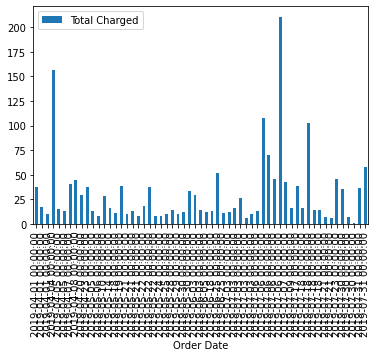

In [18]:
df.plot.bar(x='Order Date', y='Total Charged', rot=90)

That chart is a little small, and it’s hard to see whether we’ve really gotten what we want. Let’s make it bigger so that we can read the data more easily.

We can do that by adding an argument to our plotting code called figsize. This allows us to define the size of the graph (fig is short for figure) by width and height. The units it uses aren’t particularly intuitive, but (20, 10) is a good default to start from for most charts, and then we can adjust further if needed.

All we need to do is add figsize=(20,10) to the arguments we already have in our code. Note that each separate argument is separated with a comma.

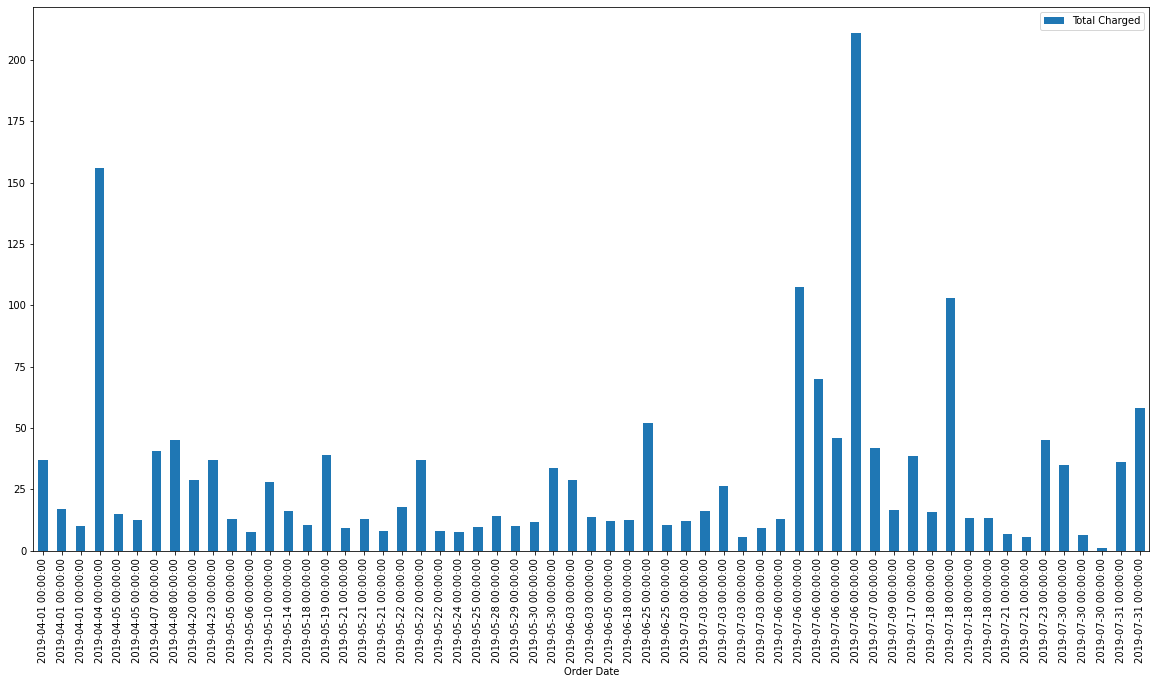

In [19]:
df.plot.bar(x='Order Date', y='Total Charged', rot=90, figsize=(20,10))

That’s easier to read! But if we take a close look at the chart above, we can spot a problem: when multiple orders were placed on the same day, each order is getting a separate bar in the bar chart. Look, for example, at the first three bars on the chart — all three of them are for April 1, representing three separate orders placed that day.

That’s not really what we were trying to visualize. We want to see how much was spent each day. Each bar should represent a day, not a single order, so if there was more than one order on that day, the totals charged for those orders should be added together.

We can do that using another built-in pandas function: df.groupby().

The syntax for this is a little bit complex, but we can break what we want to do down into two parts: 1. We want to group our data by 'Order Date', so that all the orders that share the same date are counted in a single row (i.e., we want one row for April 1, rather than three). 2. We want to get the sum of the prices paid in 'Total Charged' column for each date and make it the value for 'Total Charged' in the relevant date’s row (i.e., we want the value of 'Total Charged' in the April 1 row to be the sum total of the three orders placed that day).

Since we’re grouping by the order date, we’ll start with df.groupby('Order Date'). The next thing we need to do is take the sum of the 'Total Charged' column in that group and set the make that our new 'Total Charged' column, so we’ll follow the first part with .sum()["Total Charged"].

We want to assign the result of that, which will be a pandas Series, to a new variable. Let’s call it daily_orders.

Here’s what it looks like all together:

In [20]:
daily_orders = df.groupby('Order Date').sum()["Total Charged"]
daily_orders.head()

Order Date
2019-04-01     63.91
2019-04-04    156.12
2019-04-05     27.64
2019-04-07     40.63
2019-04-08     44.99
Name: Total Charged, dtype: float64

As we can see, the results of .head() look a bit different here. That’s because this is a Series rather than a DataFrame. It looks like it has two columns, but it actually only has one: the 'Order Date' column entries are actually the index labels for our sums.

Understanding precisely how this works isn’t important for this tutorial, but if you scroll up to one of your earlier df.head() printouts, you may notice that along the far left side of the table are descending numbers: 0, 1, 2, 3, 4… These numbers are index labels.

Thankfully, pandas is well equipped to plot a Series with dates as index labels, so we don’t have to do anything else with our data. And if we check the numbers in our earlier DataFrame, we can see that our sums here are correct. April 1, 2019 had three separate orders, $36.93, $16.99, and $9.99. The sum of these three is $63.91, which is the value for April 1 in daily_orders. Perfect!

It’s time to make it into a bar graph. We can do that with Series.plot.bar(), and since our series only has one column and one set of index labels, we don’t even need to define our x and y axes. Pandas will do that automatically.

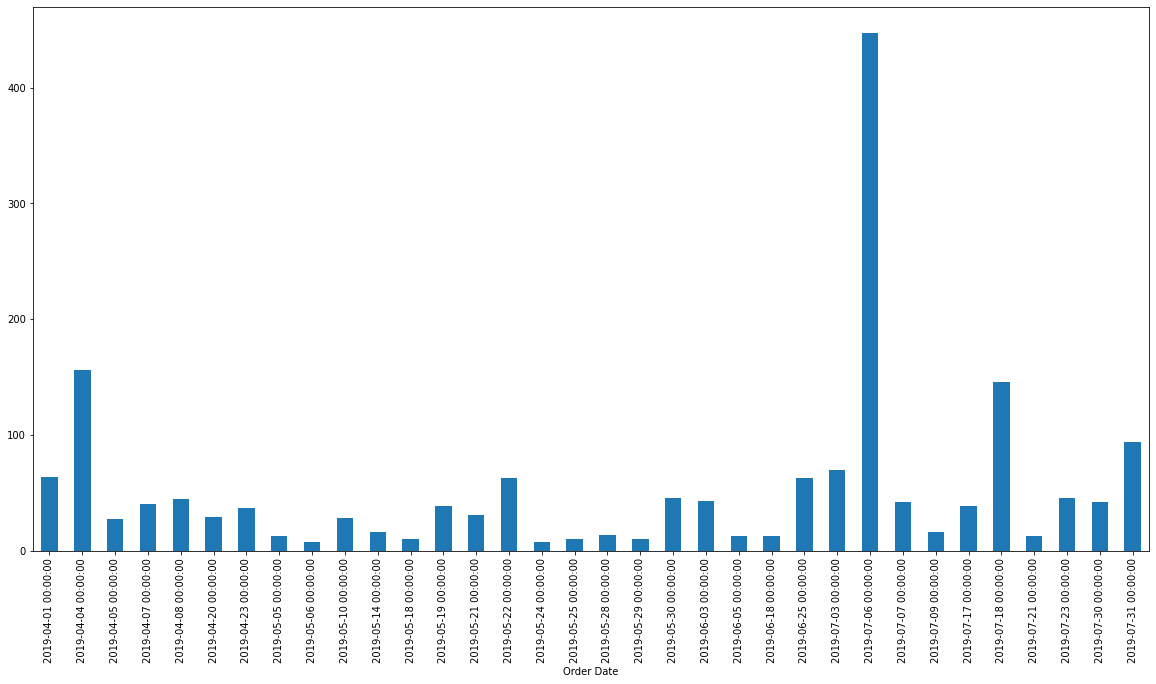

In [21]:
daily_orders.plot.bar(figsize=(20,10))

Awesome! This chart shows us something our previous analysis hasn’t: although the biggest single order was just over $ 200, there was a single day in July where several orders totaled up to well over $ 400.

Clearly, there are still a lot of ways we could improve on this chart. We could remove the time codes at the bottom, add a Y label and a chart title, insert dates with no orders to get a more consistent picture of when orders were placed, etc.

But our goal here wasn’t to create a picture perfect chart. It was to use some quick programming to mine some insight out of a large data set. And we’ve learned a lot! We’ve learned:

* How much I spent on Amazon during this period.
* What my highest, lowest, and average order totals were.
* How much tax I paid, and the effective sales tax rate I paid.
* How my spending fluctuated over time
* On which days I spent the most money.

And we did all of that with fewer than thirty total lines of code!